In [1]:
from tensorflow.compat.v1 import ConfigProto

from tensorflow.compat.v1 import InteractiveSession


config = ConfigProto()

config.gpu_options.allow_growth= True

session = InteractiveSession(config=config)
import tensorflow as tf

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import glob
from PIL import Image
from keras.utils import to_categorical
import pandas as pd
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import pickle
import random
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, Concatenate, Reshape, Activation
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import SGD


Using TensorFlow backend.


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                    zoom_range=0.2,
                                   validation_split=0.2
                                   )
test_datagen = ImageDataGenerator(rescale=1./255,rotation_range=10)

In [4]:
train_generator = train_datagen.flow_from_directory(
        './img_pre',
        target_size=(100, 100),
        batch_size=10,
        class_mode='categorical')

Found 7320 images belonging to 3 classes.


In [5]:
def simple_model(len_label):
    model = models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(100,100,3)))
    model.add(Conv2D(64, (3, 3), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(len_label, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model = simple_model(len(train_generator.class_indices))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               18874496  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 18,894,275
Trainable params: 18,894,275
Non-trainable params: 0
__________________________________________

In [7]:
model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10




50/50 [==============================] - 4s 79ms/step - loss: 5.0968 - acc: 0.6400
Epoch 2/10
50/50 [==============================] - 2s 32ms/step - loss: 1.1080 - acc: 0.7840
Epoch 3/10
50/50 [==============================] - 2s 33ms/step - loss: 0.3429 - acc: 0.8500
Epoch 4/10
50/50 [==============================] - 2s 33ms/step - loss: 0.1802 - acc: 0.9000: 0s - loss: 0.1814 - acc: 0.89
Epoch 5/10
50/50 [==============================] - 2s 32ms/step - loss: 0.2055 - acc: 0.9100
Epoch 6/10
50/50 [==============================] - 2s 31ms/step - loss: 0.1977 - acc: 0.9020
Epoch 7/10
50/50 [==============================] - 2s 31ms/step - loss: 0.1932 - acc: 0.9040
Epoch 8/10
50/50 [==============================] - 2s 31ms/step - loss: 0.1609 - acc: 0.9160
Epoch 9/10
50/50 [==============================] - 2s 32ms/step - loss: 0.1367 - acc: 0.9560
Epoch 10/10
50/50 [===

In [8]:
model.save('./models/model_cate.h5')

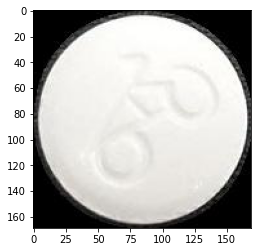

In [13]:
images = []

image = plt.imread('./test/tests/6.jpg')
images.append(image)

images = np.asarray(images)
plt.imshow(image)

In [14]:
test_generator = test_datagen.flow_from_directory(
        './test',
        target_size=(100, 100),
        batch_size=10,
        class_mode='categorical')

Found 1 images belonging to 1 classes.


In [15]:
prediction = model.predict_generator(test_generator)
print(train_generator.class_indices)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
prediction,np.argmax(prediction)

{'jangbang': 0, 'one': 1, 'samgack': 2}


(array([[0.000, 0.783, 0.217]], dtype=float32), 1)

In [16]:
for name,label in train_generator.class_indices.items():
    if label == np.argmax(prediction):
        print(name,prediction[0][label])

one 0.7828848
